# 1. Problem Statement:-
Predicting  the sales of each product at a particular store and identify key factors influencing sales.

# 2. Hypothesis Generation:-
- Products with higher visibility on shelves might have higher sales.
- Stores located in urban areas might have higher sales than compared to rural
  areas.
- Products with more advertising and promotions might have higher sales.
- Sales increase during special events or festivals.

# 3. Loading Packages:-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the training data

In [3]:
train_data=pd.read_csv('/content/drive/MyDrive/Train.csv')

#load the testing data

In [4]:
test_data=pd.read_csv('/content/drive/MyDrive/Test.csv')

#4.Data Structure and Content:-

In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [7]:
print(train_data.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [8]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [9]:
print(test_data.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000


#5.Exploratory Data Analysis:-

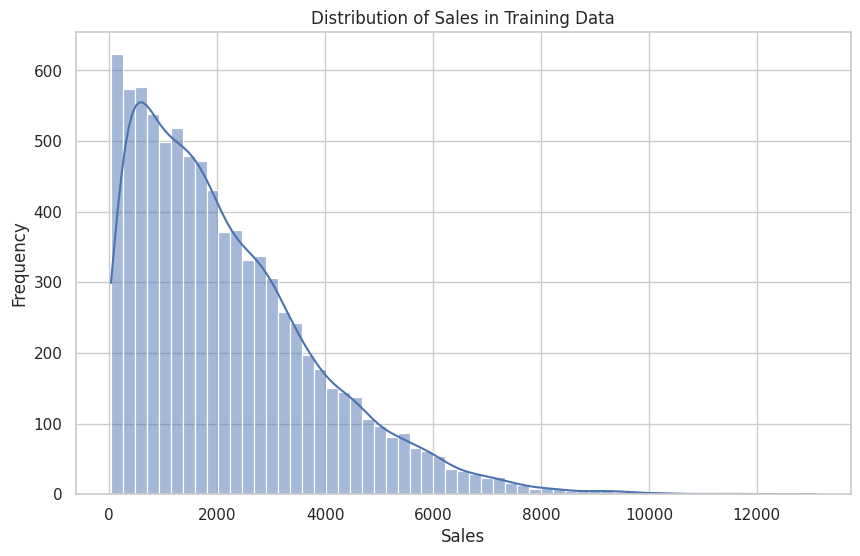

<ipython-input-10-f85414258ff8>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


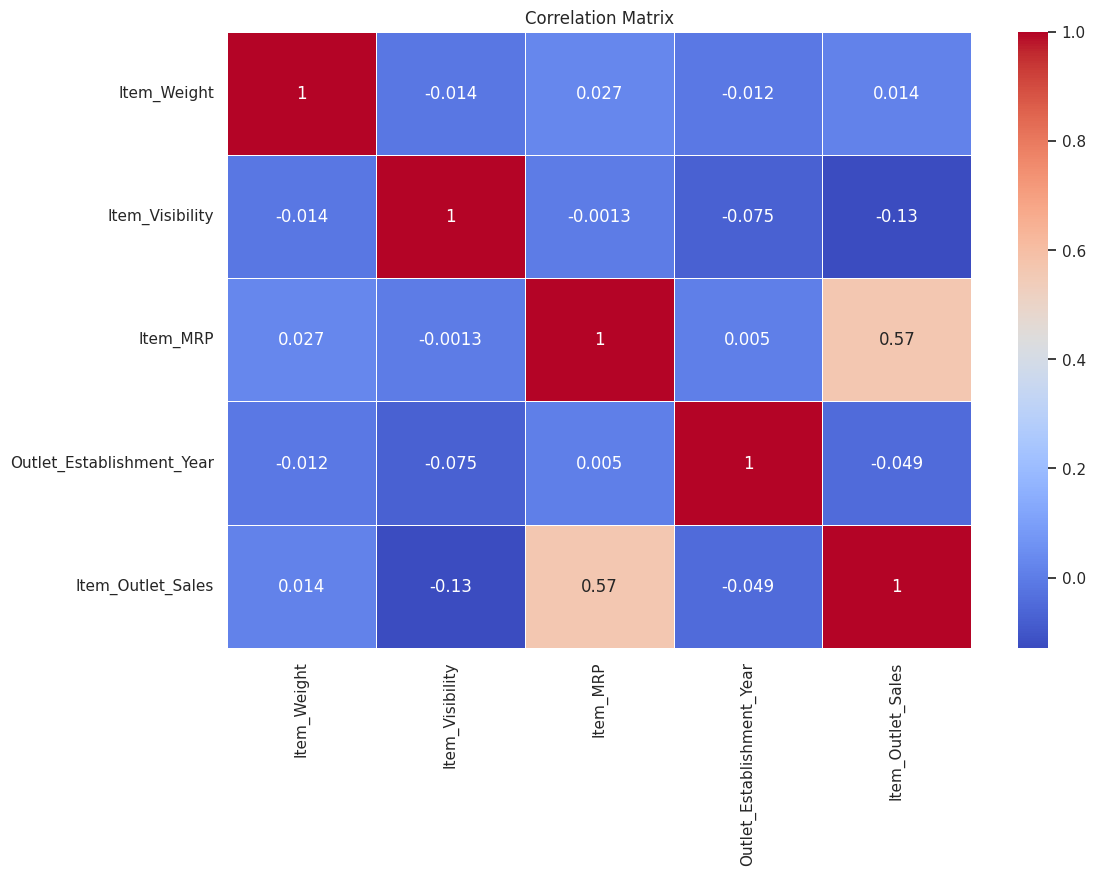

In [10]:
sns.set(style="whitegrid")
# Explore the distribution of the target variable  in the training data
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Sales in Training Data')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()
# Explore correlations between numerical features
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


#6.Univariate Analysis

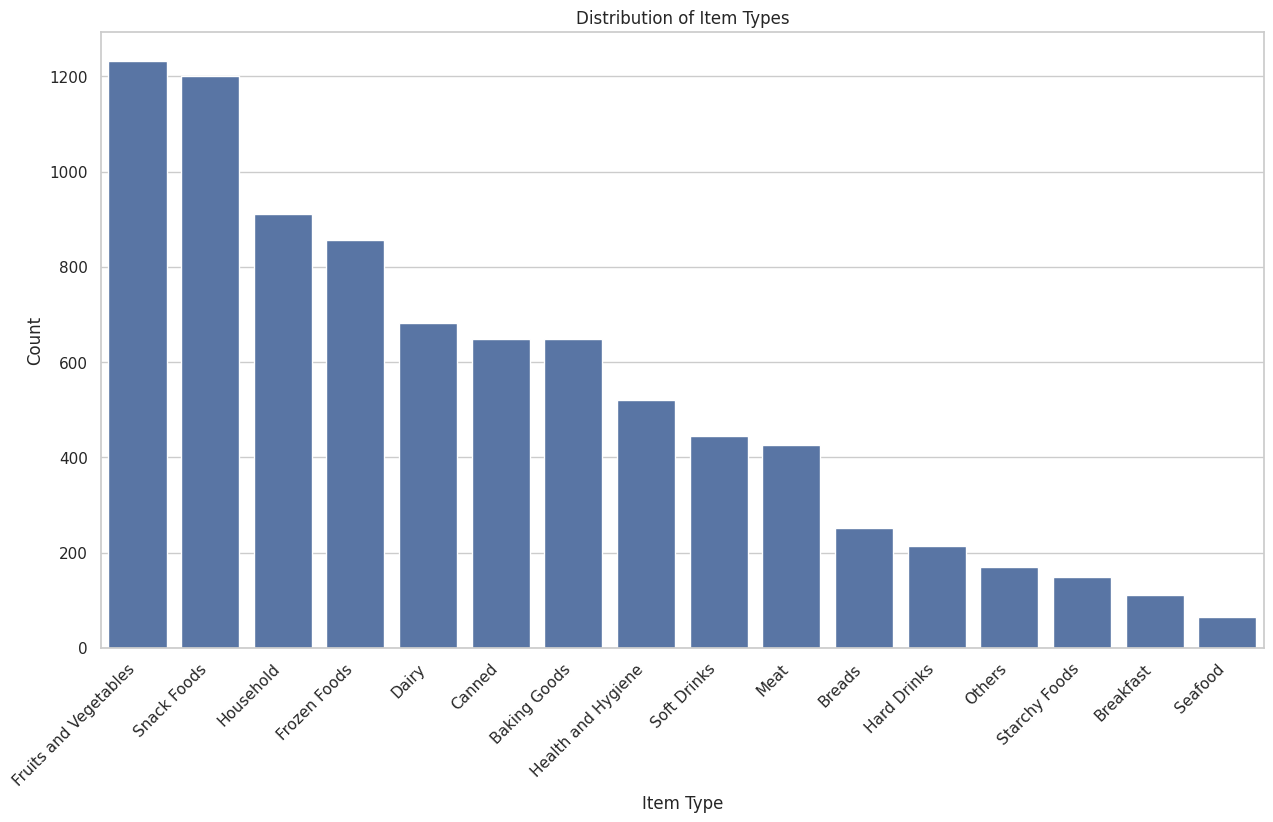

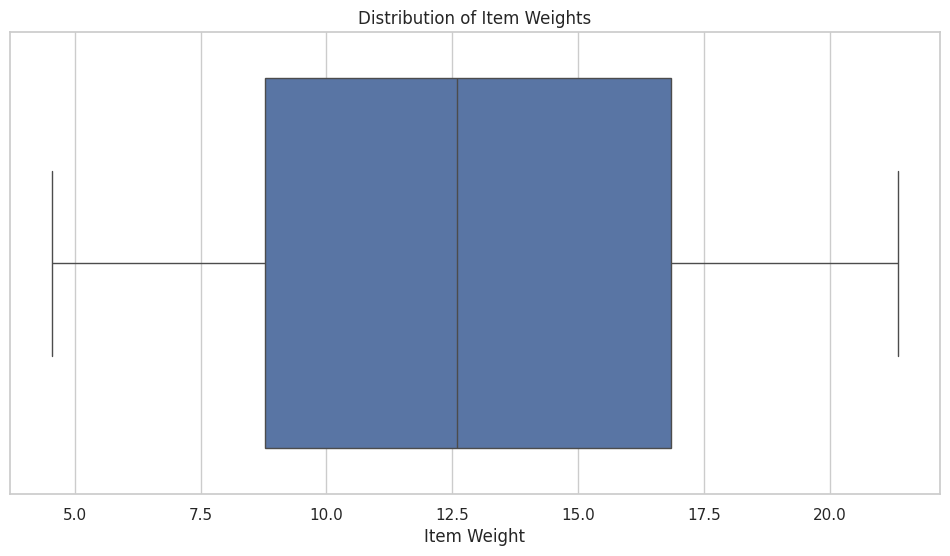

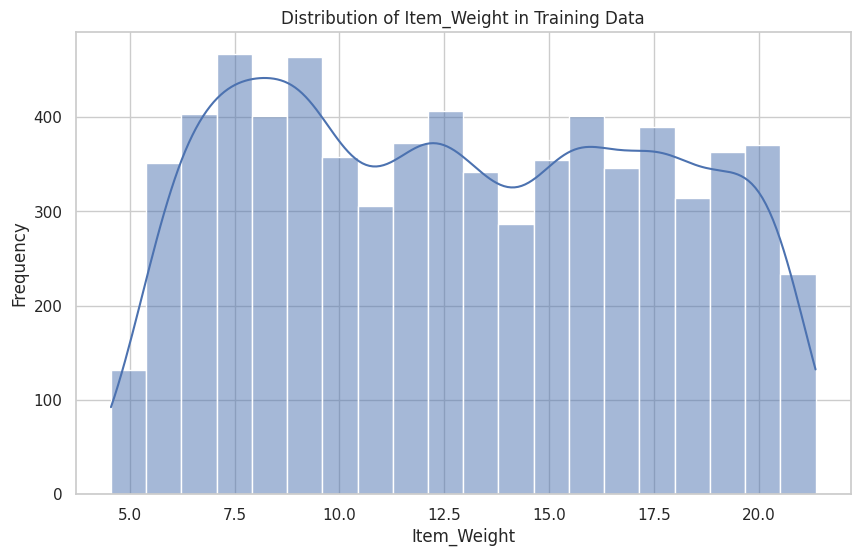

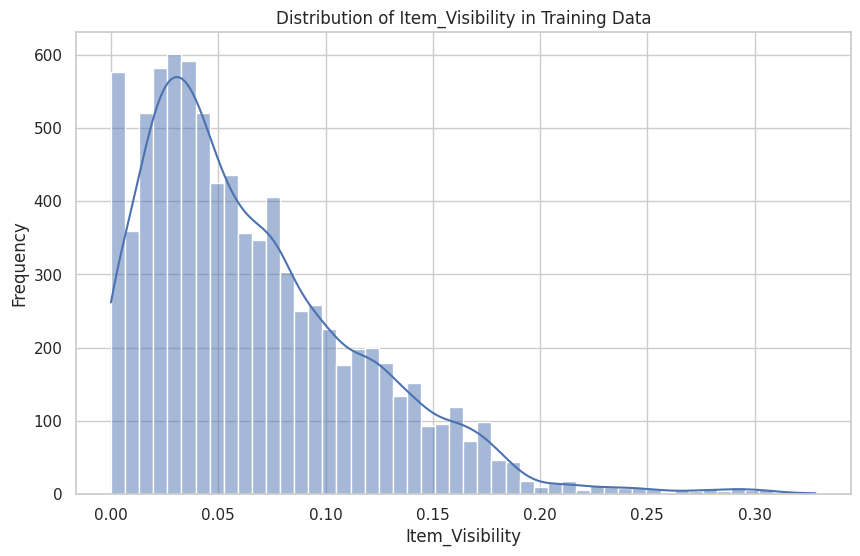

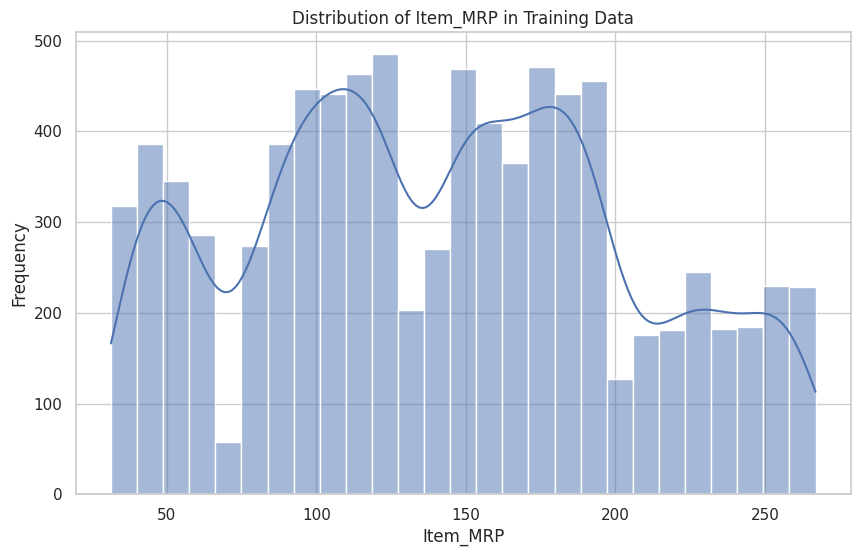

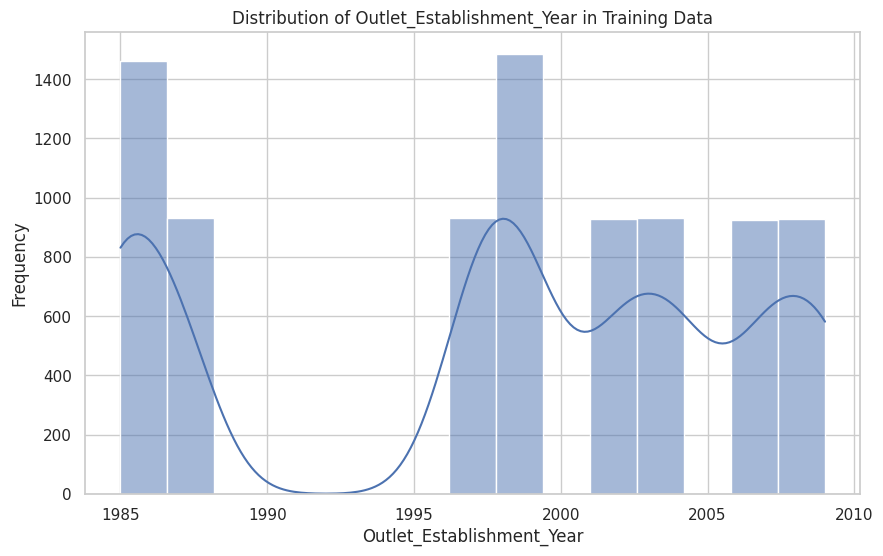

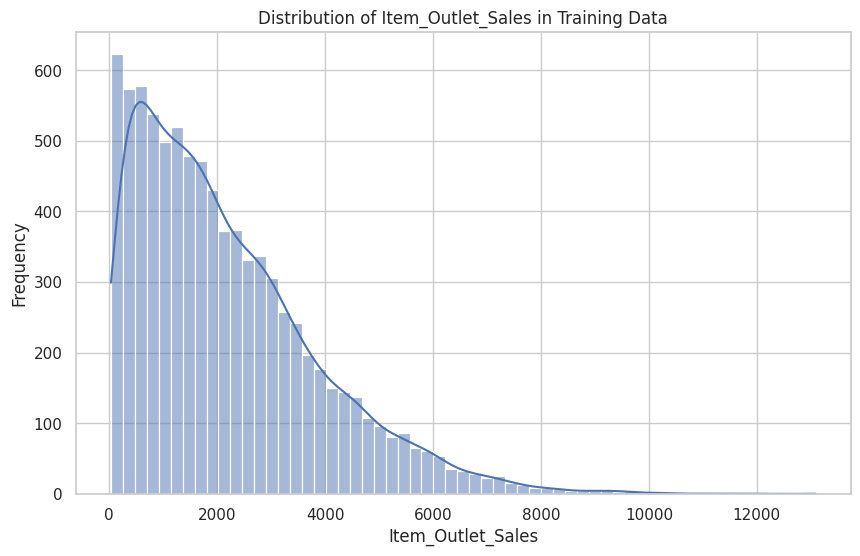

In [11]:
sns.set(style="whitegrid")
# Univariate analysis for a categorical variable
plt.figure(figsize=(15, 8))
sns.countplot(x='Item_Type', data=train_data, order=train_data['Item_Type'].value_counts().index)
plt.title('Distribution of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Univariate analysis for numerical variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Weight', data=train_data)
plt.title('Distribution of Item Weights')
plt.xlabel('Item Weight')
plt.show()

numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature} in Training Data')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#7.Bivariate Analysis

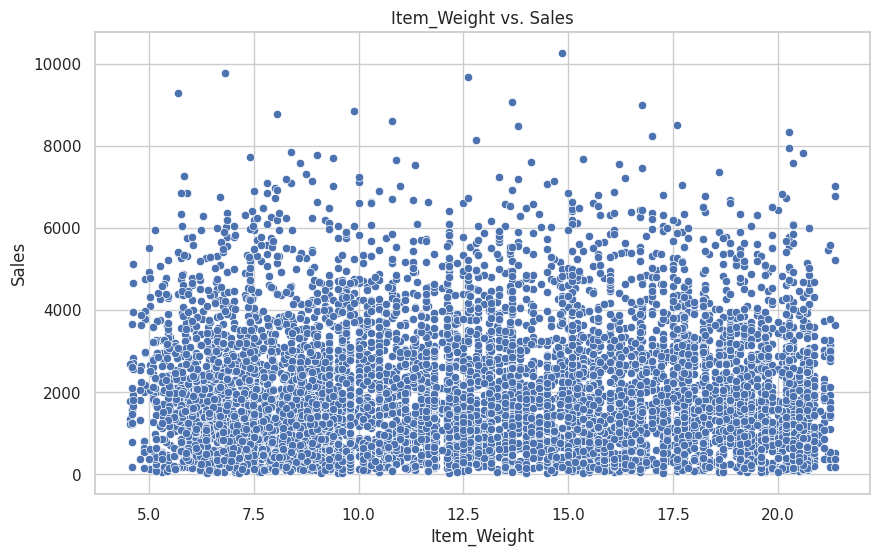

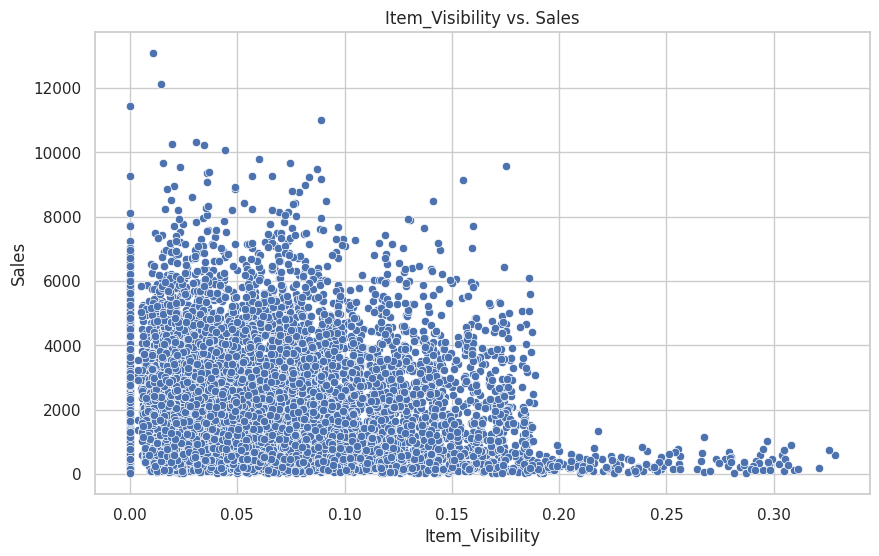

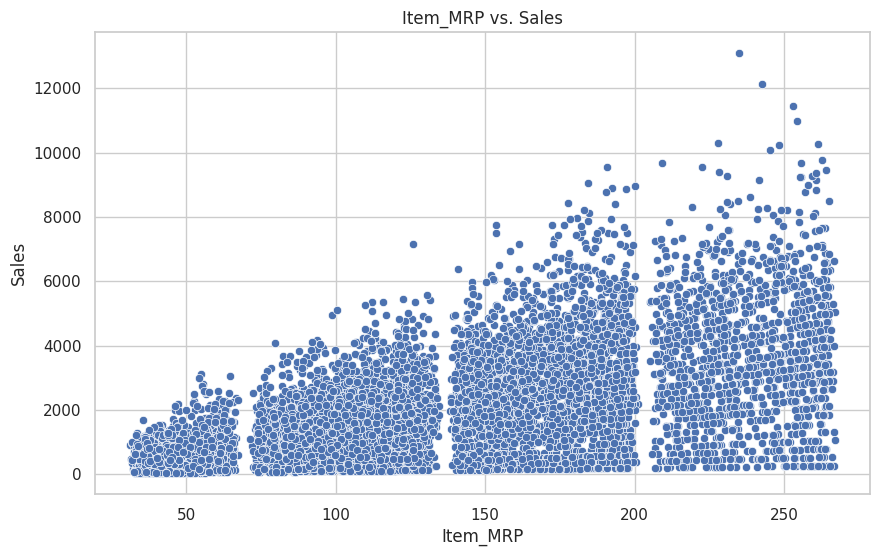

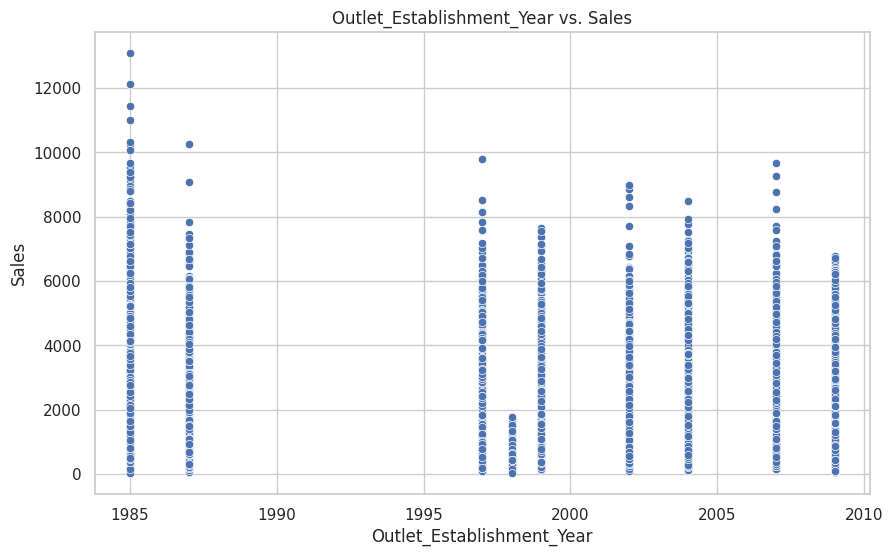

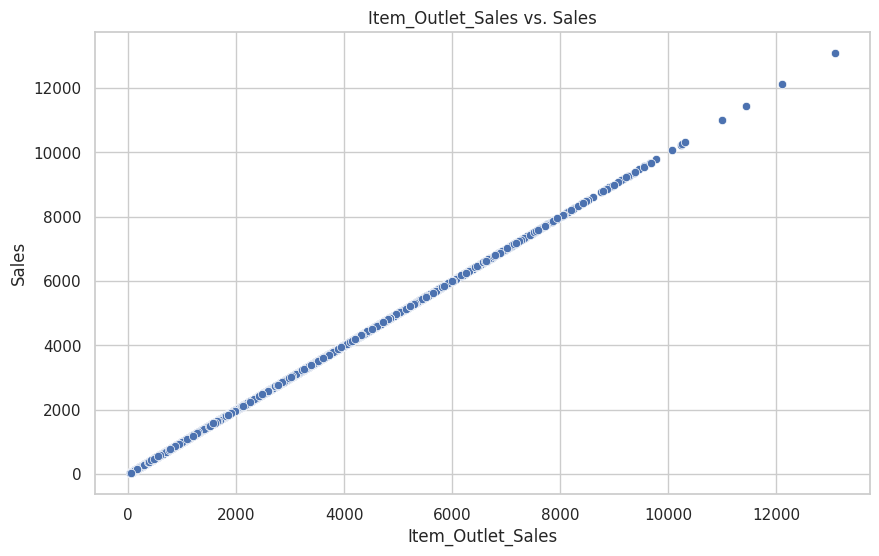

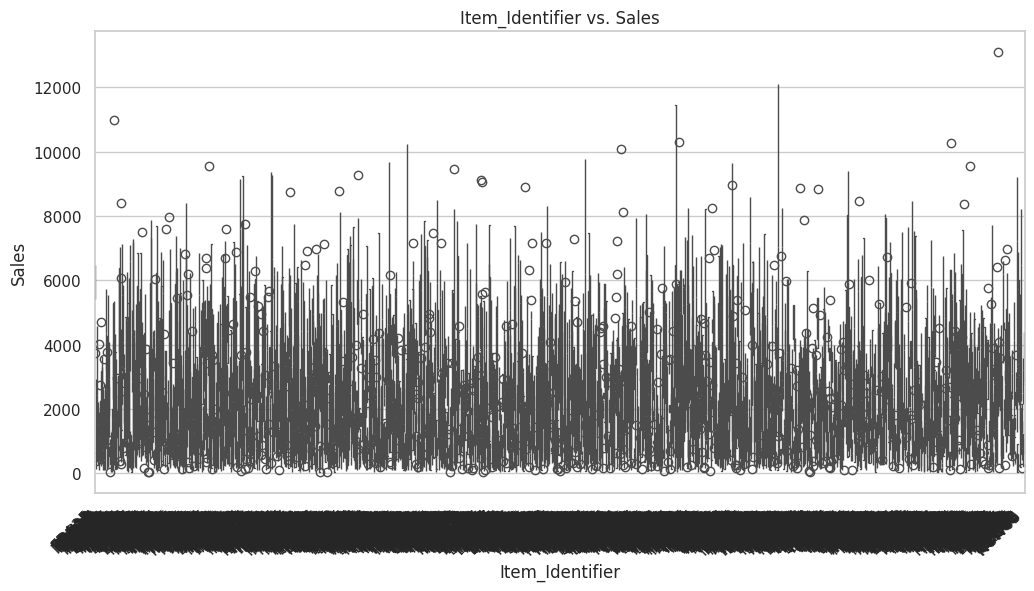

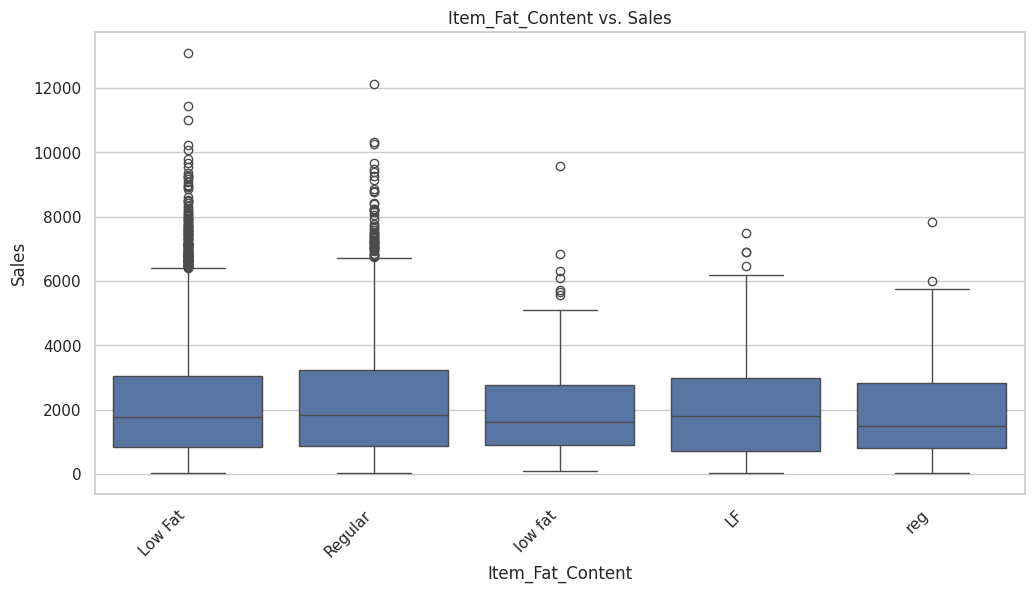

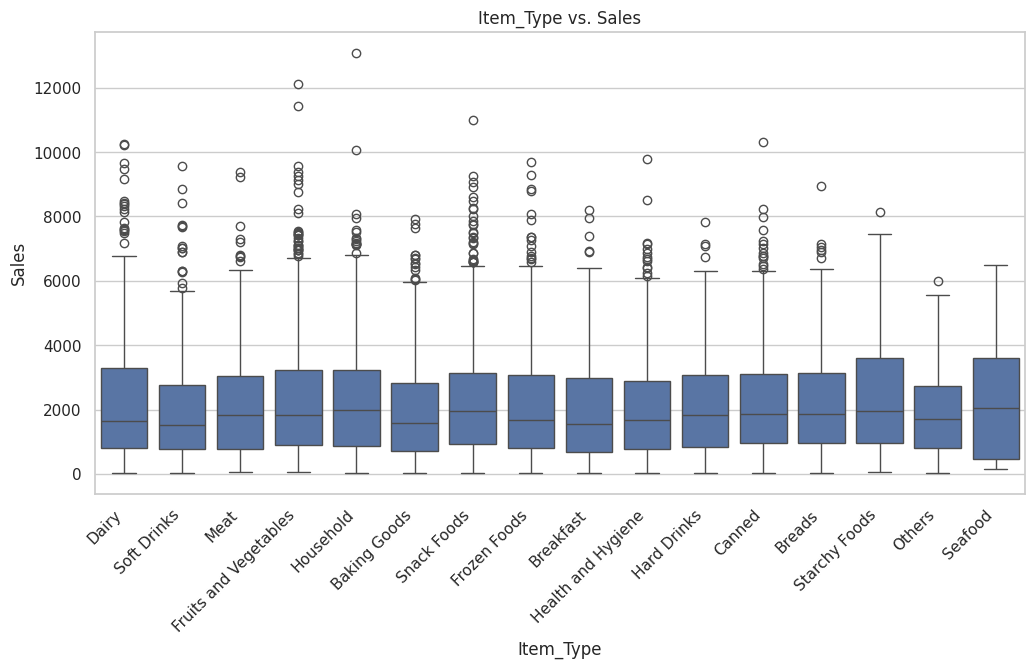

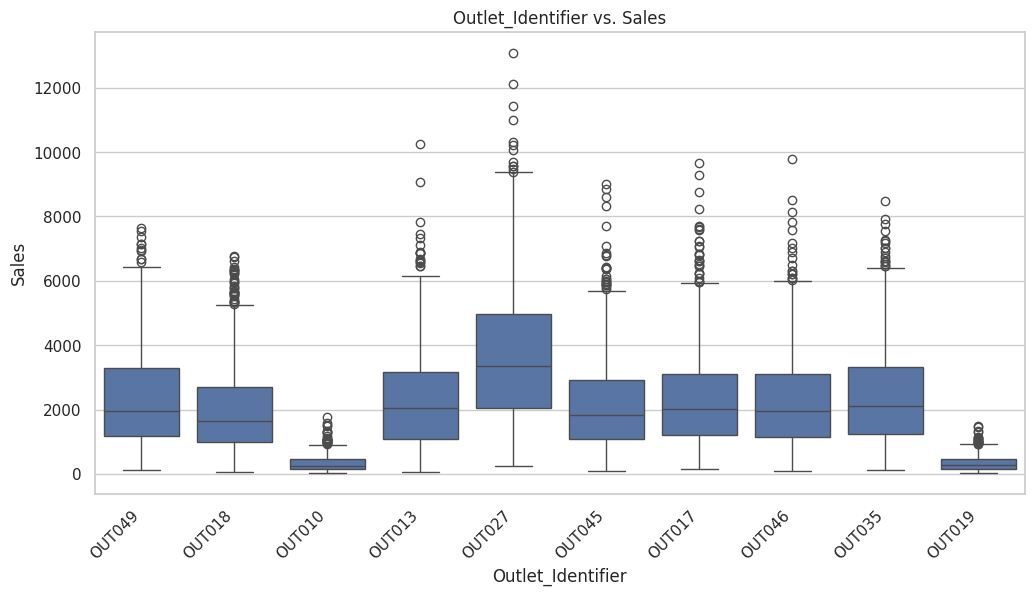

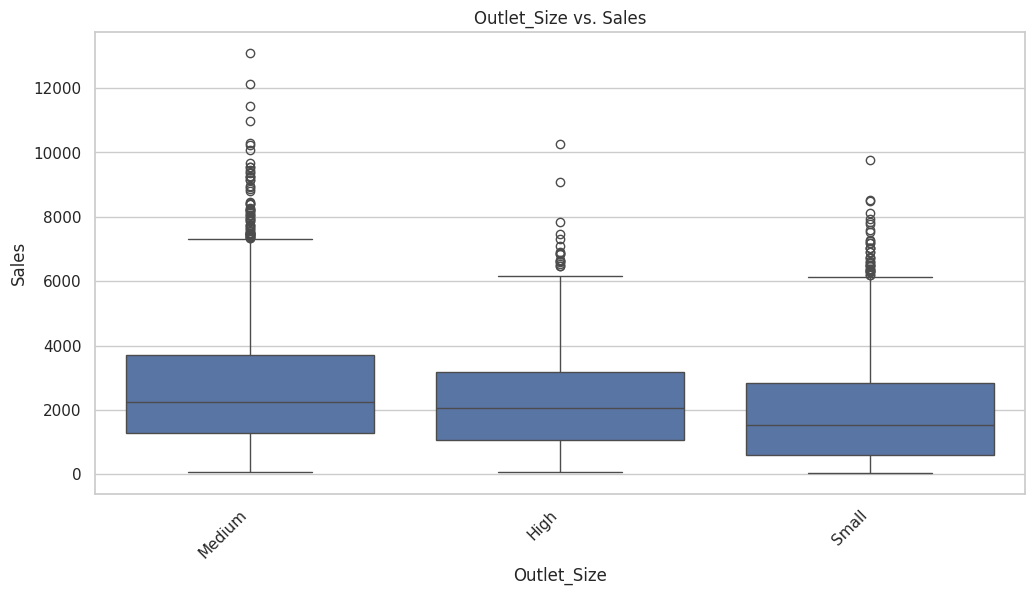

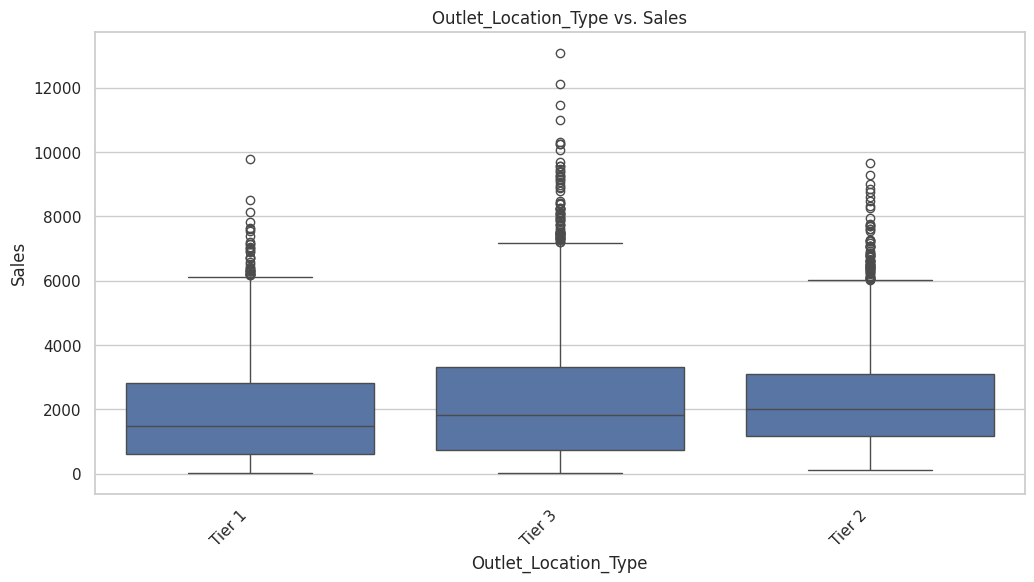

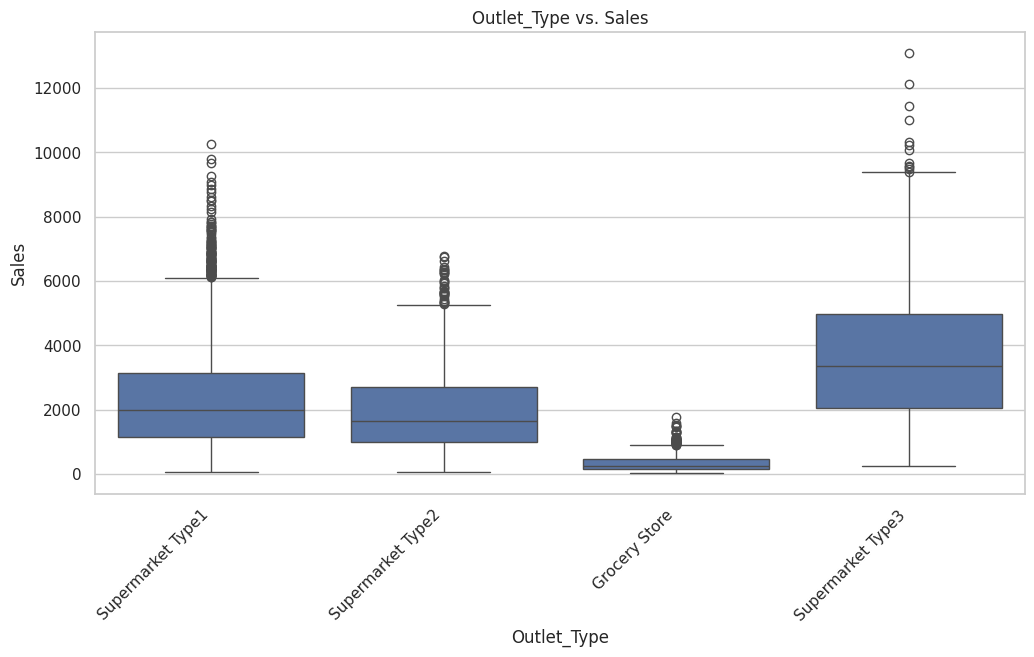

In [12]:
sns.set(style="whitegrid")

# Bivariate analysis for numerical features vs. target variable
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Item_Outlet_Sales', data=train_data)
    plt.title(f'{feature} vs. Sales')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()

# Bivariate analysis for categorical features vs. target variable
categorical_features = train_data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Item_Outlet_Sales', data=train_data)
    plt.title(f'{feature} vs. Sales')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# 8. Missing Value Treatment

In [13]:
# missing values in the training dataset
print("Missing Values in Training Data:")
print(train_data.isnull().sum())

# Impute missing values for numerical features with their mean
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    train_data[feature].fillna(train_data[feature].mean(), inplace=True)

# Impute missing values for categorical features with mode
categorical_features = train_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    train_data[feature].fillna(train_data[feature].mode()[0], inplace=True)

# missing values after treatment
print("\nMissing Values After Treatment:")
print(train_data.isnull().sum().sum())

Missing Values in Training Data:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing Values After Treatment:
0


In [14]:
# missing values in the testing dataset
print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())

# Impute missing values for numerical features with their mean
numerical_features = test_data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    test_data[feature].fillna(test_data[feature].mean(), inplace=True)

# Impute missing values for categorical features with mode
categorical_features = test_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    test_data[feature].fillna(test_data[feature].mode()[0], inplace=True)

# missing values after treatment
print("\nMissing Values After Treatment:")
print(test_data.isnull().sum().sum())


Missing Values in Testing Data:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Missing Values After Treatment:
0


# 9. Feature Engineering

In [15]:
# Create a new feature 'Total_Item_Weight' by multiplying 'Item_Weight' and 'Item_Visibility'
train_data['Total_Item_Weight'] = train_data['Item_Weight'] * train_data['Item_Visibility']
test_data['Total_Item_Weight'] = test_data['Item_Weight'] * test_data['Item_Visibility']

# Create a new feature 'Item_Fat_Content_Category' by grouping 'Item_Fat_Content'
train_data['Item_Fat_Content_Category'] = train_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'})
test_data['Item_Fat_Content_Category'] = test_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'})

# Create a new feature 'Item_Type_Combined' by combining 'Item_Type' and 'Item_Fat_Content'
train_data['Item_Type_Combined'] = train_data['Item_Type'] + '_' + train_data['Item_Fat_Content_Category']
test_data['Item_Type_Combined'] = test_data['Item_Type'] + '_' + test_data['Item_Fat_Content_Category']

# Drop unnecessary columns after feature engineering
train_data.drop(['Item_Fat_Content_Category'], axis=1, inplace=True)
test_data.drop(['Item_Fat_Content_Category'], axis=1, inplace=True)

# Display the updated structure of the training dataset
print("Updated Training Data Structure:")
print(train_data.info())


Updated Training Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Total_Item_Weight          8523 non-null   float64
 13  Item_Type_Combi

# 10. Encoding Categorical Variables

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Label Encoding for categorical variables
label_encoder = LabelEncoder()
train_data['Item_Fat_Content_LabelEncoded'] = label_encoder.fit_transform(train_data['Item_Fat_Content'])
test_data['Item_Fat_Content_LabelEncoded'] = label_encoder.transform(test_data['Item_Fat_Content'])

# One-Hot Encoding for categorical variables
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
item_type_encoded = onehot_encoder.fit_transform(train_data[['Item_Type']])
item_type_encoded_df = pd.DataFrame(item_type_encoded, columns=[f'Item_Type_{i}' for i in range(item_type_encoded.shape[1])])
train_data = pd.concat([train_data, item_type_encoded_df], axis=1)

item_type_encoded_test = onehot_encoder.transform(test_data[['Item_Type']])
item_type_encoded_test_df = pd.DataFrame(item_type_encoded_test, columns=[f'Item_Type_{i}' for i in range(item_type_encoded_test.shape[1])])
test_data = pd.concat([test_data, item_type_encoded_test_df], axis=1)

# Display
print("Updated Training Data Structure:")
print(train_data.info())

print("Updated Testing Data Structure:")
print(test_data.info())

Updated Training Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   object 
 1   Item_Weight                    8523 non-null   float64
 2   Item_Fat_Content               8523 non-null   object 
 3   Item_Visibility                8523 non-null   float64
 4   Item_Type                      8523 non-null   object 
 5   Item_MRP                       8523 non-null   float64
 6   Outlet_Identifier              8523 non-null   object 
 7   Outlet_Establishment_Year      8523 non-null   int64  
 8   Outlet_Size                    8523 non-null   object 
 9   Outlet_Location_Type           8523 non-null   object 
 10  Outlet_Type                    8523 non-null   object 
 11  Item_Outlet_Sales              8523 non-null   float64
 12  Total_Item_Weig

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 13. Preprocessing Data

In [17]:
# Dropping unnecessary columns
columns_to_drop = ['Item_Identifier', 'Outlet_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
columns_to_drop = [col for col in columns_to_drop if col in train_data.columns]

# Drop the columns
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

if 'Item_Type_Combined' in train_data.columns:
    # One-Hot Encode 'Item_Type_Combined' in both training and testing data
    combined_encoded_columns = pd.get_dummies(train_data['Item_Type_Combined'], drop_first=True).columns
    train_data = pd.concat([train_data, pd.get_dummies(train_data['Item_Type_Combined'], drop_first=True)], axis=1)
    test_data = pd.concat([test_data, pd.get_dummies(test_data['Item_Type_Combined'], columns=combined_encoded_columns, drop_first=True)], axis=1)

    # Drop the original 'Item_Type_Combined' column
    train_data.drop(columns=['Item_Type_Combined'], inplace=True)
    test_data.drop(columns=['Item_Type_Combined'], inplace=True)
else:
    # Identify categorical columns for one-hot encoding based on existing categorical columns
    categorical_columns = train_data.select_dtypes(include=['object']).columns
    train_data = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
    test_data = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

# Splitting the data into features (X) and target variable (y)
X_train = train_data.drop('Item_Outlet_Sales', axis=1)
y_train = train_data['Item_Outlet_Sales']
X_test = test_data

# Standard Scaling for numerical features
from sklearn.preprocessing import StandardScaler

numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns=numerical_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_features]), columns=numerical_features)


<ipython-input-17-0f11af84002d>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)
<ipython-input-17-0f11af84002d>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.fillna(test_data.mean(), inplace=True)


# 14. Modeling

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Splitting the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_split, y_train_split)

# Prediction on the validation set
y_val_pred = linear_reg_model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

# Display
print("\nLinear Regression Coefficients:")
coefficients = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': linear_reg_model.coef_})
print(coefficients)

Mean Squared Error on Validation Set: 1801065.0737782815

Linear Regression Coefficients:
                          Feature  Coefficient
0                     Item_Weight    -1.177904
1                 Item_Visibility  -218.509738
2                        Item_MRP   969.130293
3       Outlet_Establishment_Year  -120.867098
4               Total_Item_Weight   -25.259038
5   Item_Fat_Content_LabelEncoded    13.645595
6                     Item_Type_0    -5.630420
7                     Item_Type_1     5.215133
8                     Item_Type_2    16.320939
9                     Item_Type_3   -28.743119
10                    Item_Type_4    -2.976153
11                    Item_Type_5    23.764169
12                    Item_Type_6     5.295237
13                    Item_Type_7   -11.623040
14                    Item_Type_8   -17.543398
15                    Item_Type_9    -8.711027
16                   Item_Type_10   -27.761542
17                   Item_Type_11    22.084941
18               

# 15. Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the preprocessed training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_split, y_train_split)

# Prediction on the validation set
y_val_pred = linear_reg_model.predict(X_val)

# performance evaluation
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

y_test_pred = linear_reg_model.predict(X_test_scaled)
print(y_test_pred[:3])

Mean Squared Error on Validation Set: 1801065.0737782815
[1933.52196237 1312.39667781 3389.61746676]


# 16. Regularized Linear Regression (Ridge)

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Splitting the preprocessed training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
alpha = 0.01
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_split, y_train_split)

# Prediction on the validation set
y_val_pred = ridge_model.predict(X_val)

# performance evaluation
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set (Ridge): {mse}')

y_test_pred_ridge = ridge_model.predict(X_test_scaled)
print(y_test_pred_ridge[:2])

Mean Squared Error on Validation Set (Ridge): 1801064.9402862615
[1933.52446268 1312.39756873]


In [24]:
# (Lasso)
from sklearn.linear_model import Lasso
alpha = 0.05
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_split, y_train_split)

# Prediction on the validation set
y_val_pred_lasso = lasso_model.predict(X_val)

#performance evaluation
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
print(f'Mean Squared Error on Validation Set (Lasso): {mse_lasso}')

y_test_pred_lasso = lasso_model.predict(X_test_scaled)
print(y_test_pred_lasso[:4])

Mean Squared Error on Validation Set (Lasso): 1801026.6094718457
[1933.48291045 1312.50420399 3389.91762614 2524.11926835]


# 17. Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Spliting the preprocessed training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Initialize
n_estimators = 100
random_forest_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

# Train the model on the training set
random_forest_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_val_pred_rf = random_forest_model.predict(X_val)

# Evaluate the performance on the validation set
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print(f'Mean Squared Error on Validation Set (Random Forest): {mse_rf}')

y_test_pred_rf = random_forest_model.predict(X_test_scaled)
print(y_test_pred_rf[:3])

Mean Squared Error on Validation Set (Random Forest): 1754974.2861167507
[1836.349638 1284.208356  551.295716]


# 18. XGBoost

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Splitting the preprocessed training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Initialize
n_estimators = 100
learning_rate = 0.1
xgb_model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
xgb_model.fit(X_train_split, y_train_split)

# Prediction on the validation set
y_val_pred_xgb = xgb_model.predict(X_val)

# performance evaluation
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)

print(f'Mean Squared Error on Validation Set (XGBoost): {mse_xgb}')
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

print("Predicted Sales on Test Set:")
print(y_test_pred_xgb[:5])

Mean Squared Error on Validation Set (XGBoost): 1557456.285728471
Predicted Sales on Test Set:
[1625.6333  1311.9404   736.36096 2496.2256  2013.7267 ]


#Final Model

In [30]:
# Initialize the chosen model
final_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the final model on the entire preprocessed training data
final_model.fit(X_train_scaled, y_train)

y_test_pred_final = final_model.predict(X_test_scaled)
print(y_test_pred_final[:3])
# Saving the final model
import joblib
joblib.dump(final_model, 'final_model.joblib')

feature_importances = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': final_model.feature_importances_})
print("\nFeature Importances:")
print(feature_importances.sort_values(by='Importance', ascending=False))


[1740.953814 1307.391512  645.95916 ]

Feature Importances:
                          Feature  Importance
2                        Item_MRP    0.472529
1                 Item_Visibility    0.132684
3       Outlet_Establishment_Year    0.128904
4               Total_Item_Weight    0.099122
0                     Item_Weight    0.047324
5   Item_Fat_Content_LabelEncoded    0.024414
11                    Item_Type_5    0.012785
18                   Item_Type_12    0.012067
14                    Item_Type_8    0.009142
9                     Item_Type_3    0.008600
10                    Item_Type_4    0.008402
8                     Item_Type_2    0.007475
19                   Item_Type_13    0.006835
13                    Item_Type_7    0.005917
15                    Item_Type_9    0.005708
20                   Item_Type_14    0.003815
6                     Item_Type_0    0.003356
16                   Item_Type_10    0.003201
7                     Item_Type_1    0.002944
12                  

summary:-
# The goal of this data science project was to predict the sales of 1559 products across 10 stores in different cities for BigMart.
# The dataset included information about products, stores, and certain attributes affecting sales.

# Key Steps in the Project:
# - Extensive exploratory data analysis (EDA) to understand the data distribution and identify patterns.
# - Handling missing values in a structured manner to address technical glitches in store reporting.
# - Feature engineering to create new features and enhance the predictive power of the model.
# - Encoding categorical variables to convert them into a format suitable for machine learning models.
# - Implementing linear regression, regularized linear regression (Ridge and Lasso), Random Forest, and XGBoost models.

# Insights and Findings:
# - The "Item_Type_Combined" feature showed a significant impact on sales, with certain categories contributing more than others.
# - Regularized linear regression models (Ridge and Lasso) helped manage overfitting and improved performance.
# - Random Forest and XGBoost models provided competitive results, with Random Forest exhibiting strong predictive power.

# Challenges Faced:
# - Handling missing values required careful consideration, and imputing strategies were implemented based on data characteristics.
# - Balancing between model complexity and interpretability, particularly in feature engineering and selection.

#conclusion:-
# Based on the analysis and performance evaluation, the Random Forest model is chosen as the final model for its robust predictive power.

# The final model is trained on the entire preprocessed training dataset, and predictions can be made on the test set for further analysis.

#The chosen Random Forest model demonstrated strong predictive performance, and its feature importances provide insights into key drivers of sales.

# The project laid the foundation for understanding the impact of various attributes on sales and can be extended for ongoing analysis and model refinement.